# Displays the Frequent Colors Found
### Uses:
- Display the colors found in legend and cells

Top 6 most frequent colors and their counts:
Color: [255 255 255], Count: 738540
Color: [110 165 222], Count: 156194
Color: [117 221 255], Count: 87421
Color: [ 97  55 156], Count: 78927
Color: [ 91   0 124], Count: 51317
Color: [104 110 189], Count: 50867


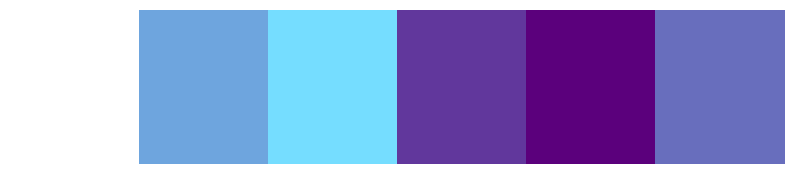

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Specify the directory you want to use
specific_dir = 'C:\\Users\\roche\\Documents\\GitHub\\encoder-tool'

# Replace with your image path relative to the specific directory
image_path = os.path.join(specific_dir, 'generated-heatmaps', 'Absence_of_corruption_Index__IDEA_.png')
image = Image.open(image_path)
image = image.convert('RGB')  # Ensure image is in RGB format
image_array = np.array(image)

# Reshape the array to a 2D array where each row is a color
pixels = image_array.reshape(-1, image_array.shape[-1])

# Find unique colors and their counts
unique_colors, counts = np.unique(pixels, axis=0, return_counts=True)

# Sort the unique colors by their counts in descending order
sorted_indices = np.argsort(-counts)
top_colors = unique_colors[sorted_indices][:6]
top_counts = counts[sorted_indices][:6]

# Display the top 6 most frequent colors and their counts
print("Top 6 most frequent colors and their counts:")
for color, count in zip(top_colors, top_counts):
    print(f"Color: {color}, Count: {count}")

# Optionally, display the top 6 most frequent colors
plt.figure(figsize=(10, 2))
plt.imshow([top_colors], aspect='auto')
plt.axis('off')
plt.show()

## Contour Detection for Grid heatmap cells region

In [36]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\thesis-tool\\generated-heatmaps'
output_dir = 'D:\\thesis-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")
            cv2.rectangle(resized_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box in green

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1051, y: 332, width: 26, height: 154
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1042, y: 345, width: 27, height: 129
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1042, y: 345, width: 27, height: 129
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1042, y: 345, width: 27, height: 129
Drawing bounding box for largest contour at x: 396, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1042, y: 332, width: 27, height: 154
Drawing bounding box for largest contour at x: 403, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour

## Removing the Detected Regions

### Uses:
- Removes the graphical content such as the grid cells and color legend to cleanly extract the text in the grid heatmap cells

In [49]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\thesis-tool\\generated-heatmaps'
output_dir = 'D:\\thesis-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Removing specific size contour at x: 1051, y: 332, width: 26, height: 154
Removing specific size contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Removing specific size contour at x: 1042, y: 345, width: 27, height: 129
Removing specific size contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Removing specific size contour at x: 1042, y: 345, width: 27, height: 129
Removing specific size contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Removing specific size contour at x: 1042, y: 345, width: 27, height: 129
Removing specific size contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for largest contour at x: 396, y: 110, width: 568, 

## Extracting Y-Axis Label from the Removed Contour Images
#### Uses:
- Extracts the texts from the region of interest
- `Note: The varying position of images sometimes include the labels in x-axis, see the instances below`

#### Next step:
- Remove integers extracted from the region of interest to include only the countries or the strings

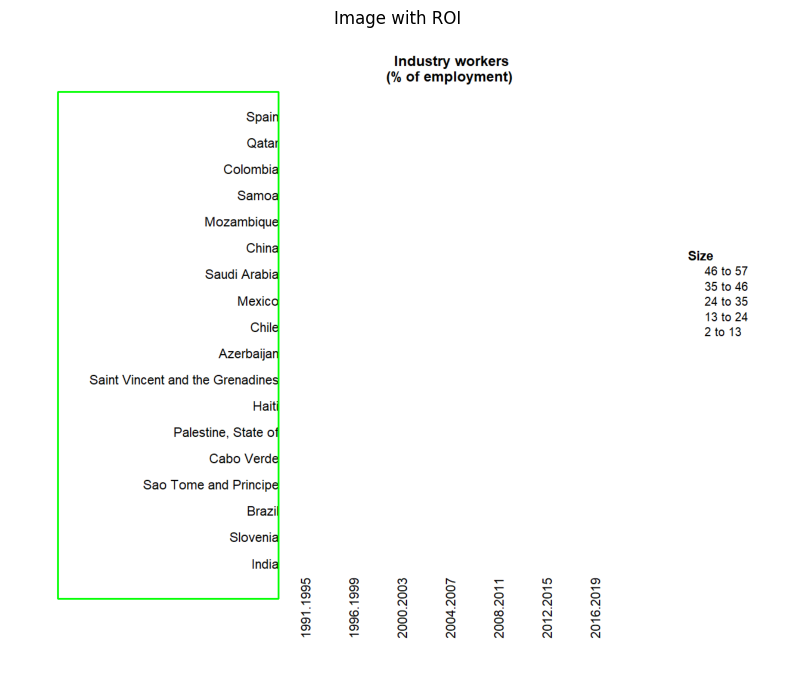

Extracted Text from ROI:
Spain

Qatal
Colombia
Samoa
Mozambique
China

Saudi Arabia

Mexico

Chile

Azerbaijan

Saint Vincent and the Grenadines
Hait

Palestine, State o

Cabo Verde

Sao Tome and Principe

Brazil

Slovenia

India




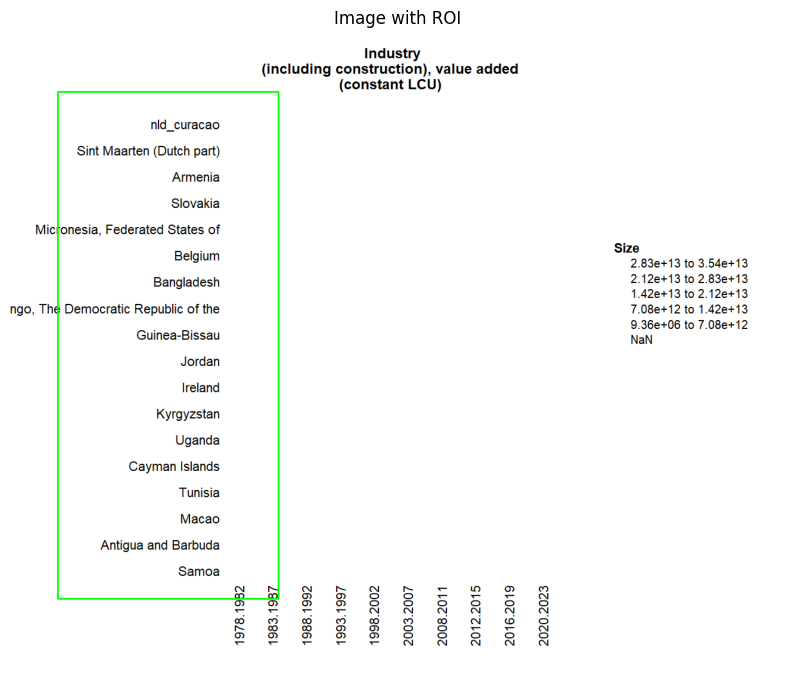

Extracted Text from ROI:
nid_curacao

Sint Maarten (Dutch part)
Armenia

Slovakia

onesia, Federated States of
Belgium

Bangladesh

Democratic Republic of the
Guinea-Bissau

Jordan

Ireland

Kyrgyzstan

Uganda

Cayman Islands

Tunisia

Macao

Antigua and Barbuda

Samoa

82

B7




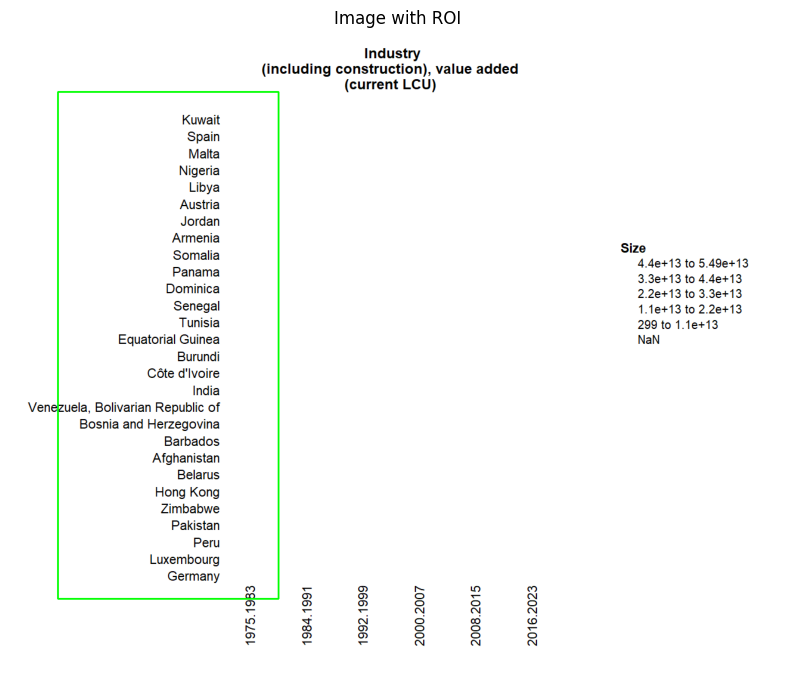

Extracted Text from ROI:
Kuwait

Spain

Malta

Nigeria

Libya

Austria

Jordan

Armenia

Somalia

Panama
Dominica
Senegal

Tunisia
Equatorial Guinea
Burundi

Céte d'Ivoire
India

zuela, Bolivarian Republic of
Bosnia and Herzegovina
Barbados

Afghanistan

Belarus

Hong Kong

Zimbabwe

Pakistan

Peru

Luxembourg

Germany

83,




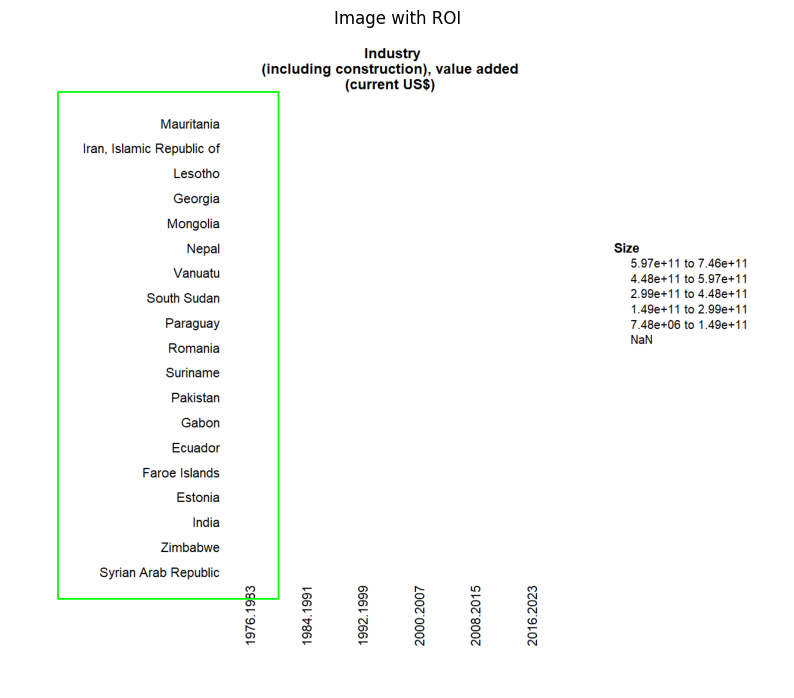

Extracted Text from ROI:
Mauritania
Iran, Islamic Republic of
Lesotho
Georgia
Mongolia
Nepal
Vanuatu
South Sudan
Paraguay
Romania
Suriname
Pakistan
Gabon
Ecuador
Faroe Islands
Estonia

India
Zimbabwe

Syrian Arab Republic

83,




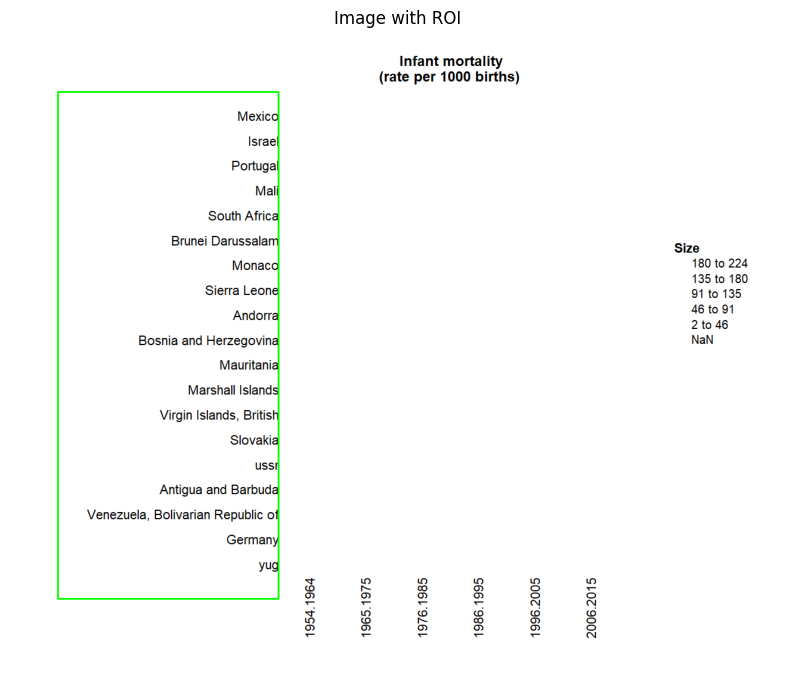

Extracted Text from ROI:
Mexico

Israel

Portugal

Mali

South Africa

Brunei Darussalam
Monaco

Sierra Leone

Andorra

Bosnia and Herzegovina
Mauritani:

Marshall Island

Virgin Islands, Britis!
Slovaki

uss

Antigua and Barbuda
Venezuela, Bolivarian Republic o’
German:

yug




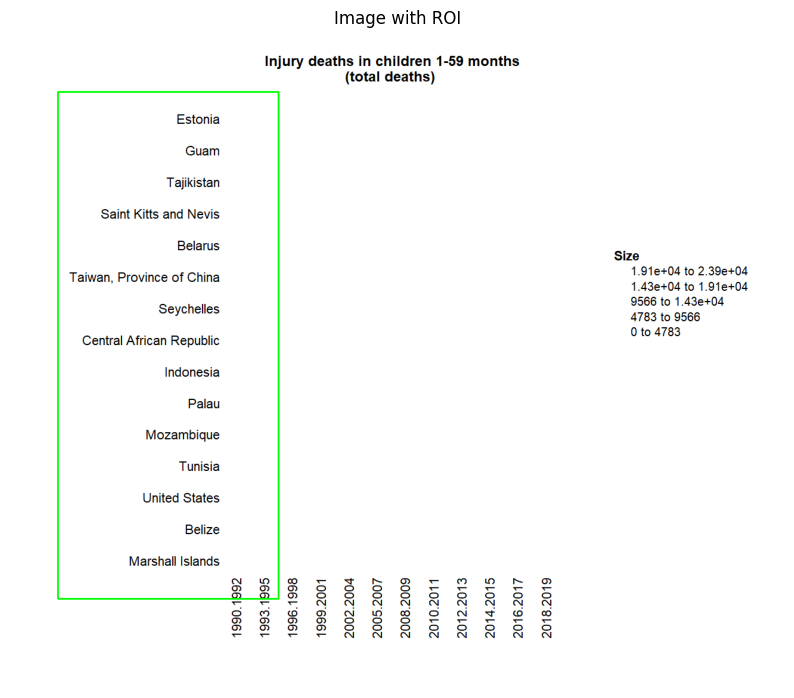

Extracted Text from ROI:
Estonia

Guam

Tajikistan

Saint Kitts and Nevis
Belarus

Taiwan, Province of China
Seychelles

Central African Republic
Indonesia

Palau

Mozambique

Tunisia

United States

Belize

Marshall Islands

92

95



Extracted Text from ROI:
Guatemala

Kazakhstan

Cuba

Netherlands

France

Mongolia

Democratic Republic of the
zuela, Bolivarian Republic of
Eswatini

Ukraine

Tonga

Rwanda

Syrian Arab Republic
Belarus

Nepal

Northern Mariana Islands
Benin

Fiji

Dominica

Luxembourg

Israel

New Caledonia

Namibia




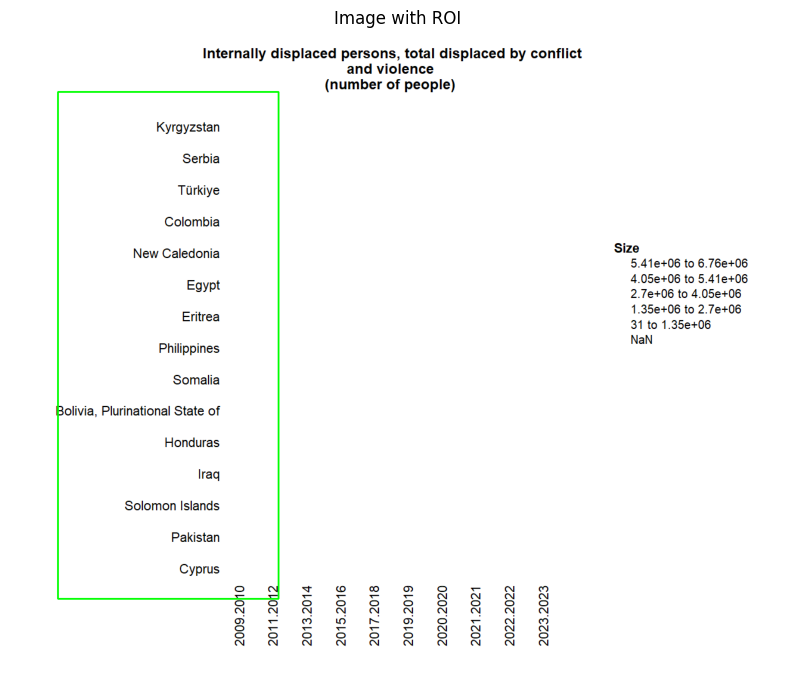

Extracted Text from ROI:
Kyrgyzstan
Serbia

Turkiye
Colombia

New Caledonia
Egypt

Eritrea
Philippines
Somalia

3olivia, Plurinational State of
Honduras

lraq

Solomon Islands
Pakistan

Cyprus




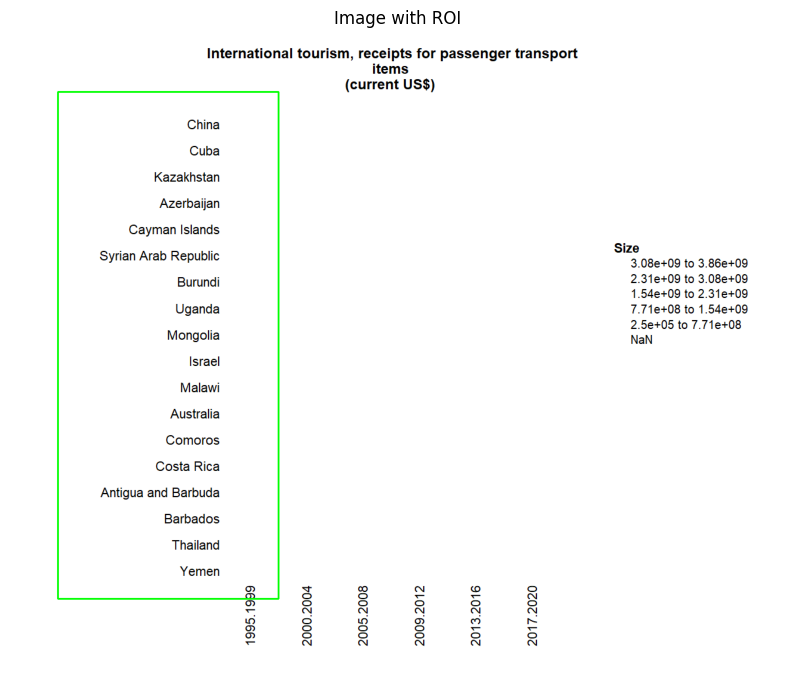

Extracted Text from ROI:
China

Cuba

Kazakhstan
Azerbaijan

Cayman Islands
Syrian Arab Republic
Burundi

Uganda

Mongolia

Israel

Malawi

Australia

Comoros

Costa Rica

Antigua and Barbuda
Barbados

Thailand

Yemen

99




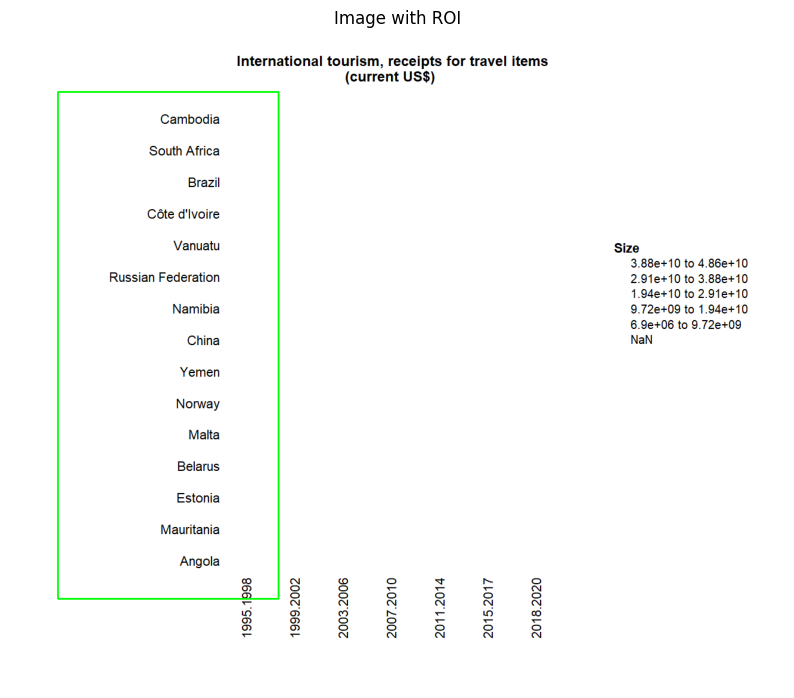

Extracted Text from ROI:
Cambodia
South Africa
Brazil

Céte d'Ivoire
Vanuatu
Russian Federation
Namibia
China
Yemen
Norway
Malta
Belarus
Estonia
Mauritania

Angola

:




Extracted Text from ROI:
Saint Vincent and the Grenadine:

Marshall Island




Extracted Text from ROI:
El Salvador
Ecuador
Guyana

Sri Lanka
Rwanda
Australia

Uzbekistan

Belgium

Spain
Cyprus
Mozambique
Céte d'Ivoire
Mauritius
Lesotho
Singapore
Latvia

Brazil
Nigeria
Egypt
Albania
Cambodia
India

Ghana
Timor-Leste
Bangladesh




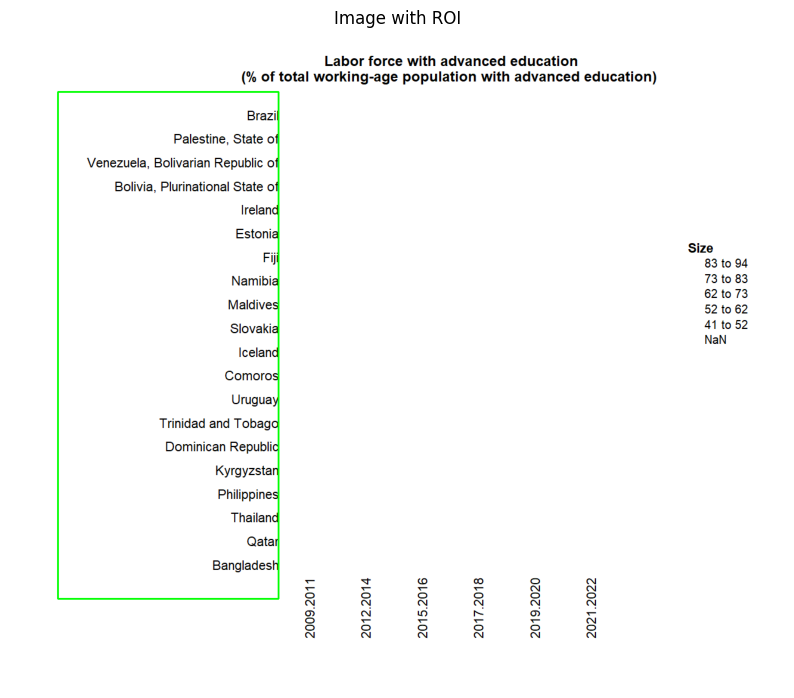

Extracted Text from ROI:
Brazil

Palestine, State o

Venezuela, Bolivarian Republic o’
Bolivia, Plurinational State o
Ireland

Estonia

Fij

Namibi:

Maldive:

Slovaki

Iceland

Comoros

Urugua

Trinidad and Tobago

Dominican Republi
Kyrgyzsta
Philippine:

Thailani

Qatal

Bangladesh




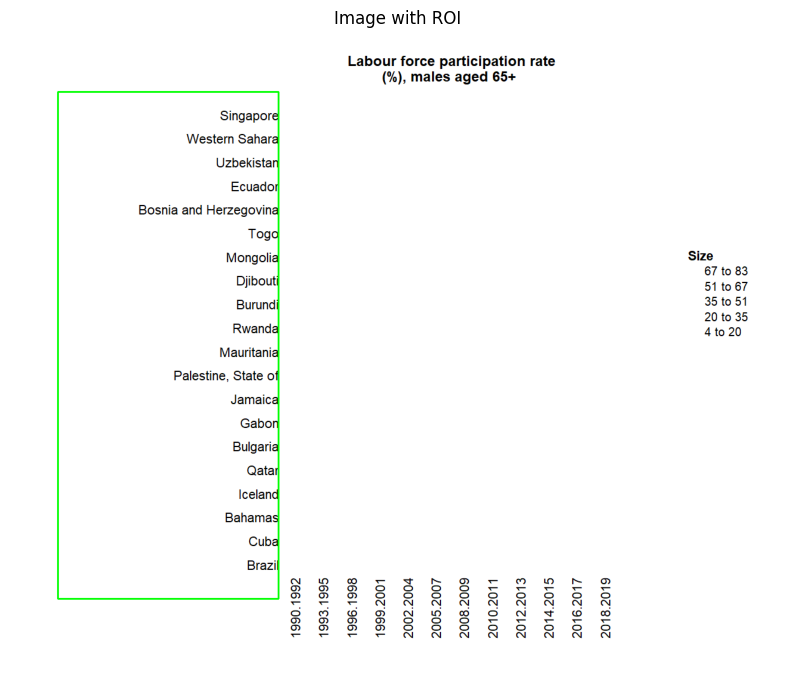

Extracted Text from ROI:
Singapore
Western Sahar.
Uzbekistan
Ecuado

Bosnia and Herzegovina
Togo

Mongolia

Djibouti

Burund

Rwanda
Mauritania
Palestine, State o
Jamaica

Gabon

Bulgaria

Qatal

Iceland

Bahamas

Cuba

Brazil




Extracted Text from ROI:
Ghan

Dominican Republi




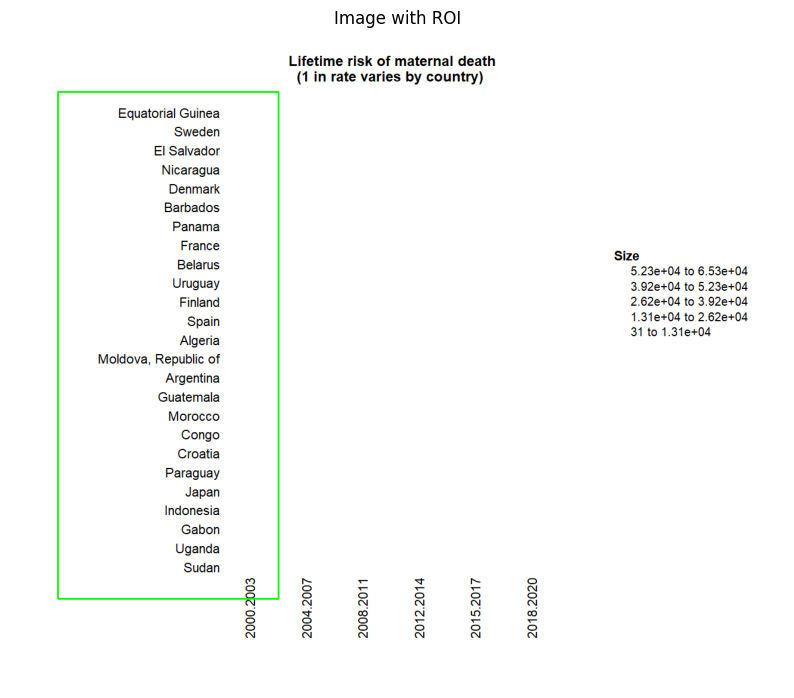

Extracted Text from ROI:
Equatorial Guinea
Sweden

El Salvador
Nicaragua
Denmark
Barbados
Panama
France
Belarus
Uruguay
Finland
Spain
Algeria
Moldova, Republic of
Argentina
Guatemala
Morocco
Congo
Croatia
Paraguay
Japan
Indonesia
Gabon
Uganda
Sudan

003




Extracted Text from ROI:
Greec!
Kazakhstal
Austri
German:
Antigua and Barbud:
Armenii
Guyani
Afghanista
Bahama:
Thailani
United State:
Tajikista
Slovaki
‘ongo, The Democratic Republic of the
Kiribati
Tunisia
Burund
Bangladesh
Norwa:
South Sudan
Singapore




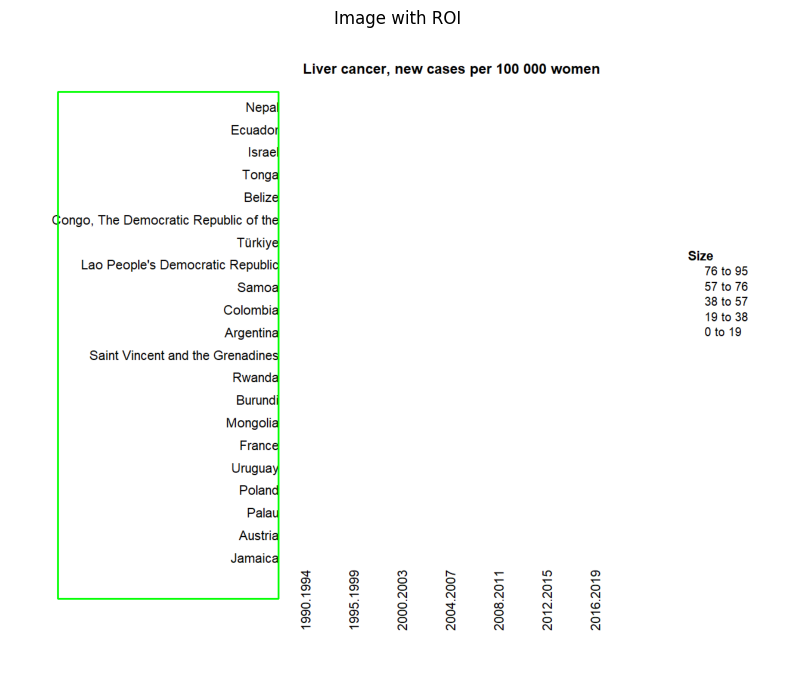

Extracted Text from ROI:
Nepal

Ecuado

Israel

Tong:

Beliz

ongo, The Democratic Republic of thi
Turkiye

Lao People's Democratic Republi
Samoa

Colombia

Argentin:

Saint Vincent and the Grenadine:
Rwand:

Burund

Mongolia

France

Urugua

Poland

Palau

Austria

Jamaica




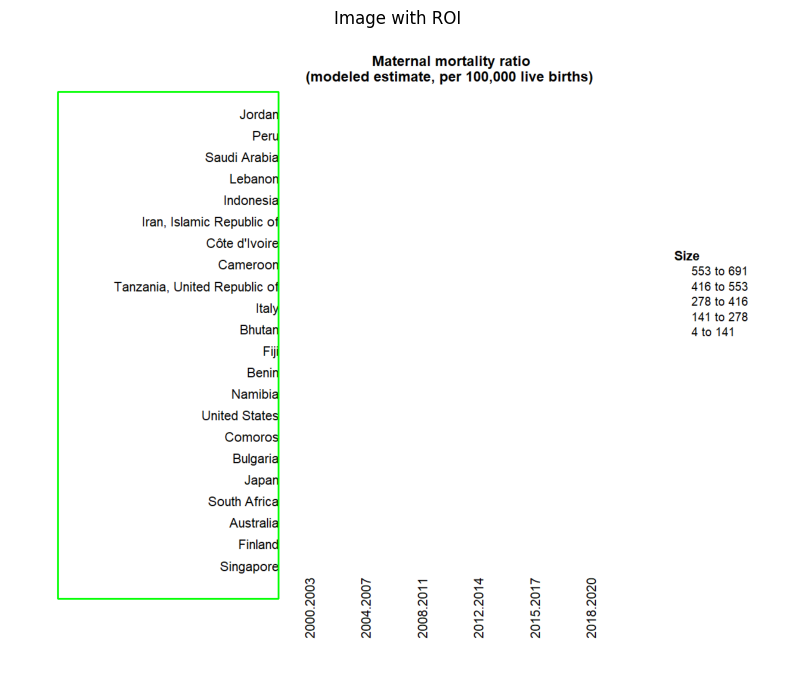

Extracted Text from ROI:
Jordai

Peri

Saudi Arabi:

Lebano

Indonesi:

Iran, Islamic Republic o
Céte d'lvoire
Cameroon

Tanzania, United Republic o'
Ital

Bhutan

Fij

Benin

Namibi:
United State:
Comoro:
Bulgari:
Japa

South Afric:
Australi
Finlan
Singapore




Extracted Text from ROI:
Senegal
Sudan
Serbia
Liberia

Nicaragua
Ireland
Zambia
Lesotho
Samoa

Mali

Cabo Verde
South Africa
Russian Federation
Guinea
Cuba

Saudi Arabia




Extracted Text from ROI:
Estonia

Czechia
Luxembourg
Hungary

Nepal

Uruguay

Romania

Paraguay

Andorra

Ethiopia

Northern Mariana Islands
Russian Federation
Samoa

chanis|

Ecuador

United Kingdom
Costa Rica

South Sudan
Tajikistan

Korea, Republic of
Antigua and Barbuda
Libya

Nauru

Grenada

Finland

American Samoa
Philippines

United States
Guyana



Extracted Text from ROI:
Comoros

Austria

Netherlands

United Arab Emirates
Bangladesh

Cabo Verde
Tajikistan

Slovakia

Korea, Republic of
Thailand

Mauritania

El Salvador
Venezuela, Bolivarian Republic of
New Caledonia
Solomon Islands
Iran, Islamic Republic of
Saint Kitts and Nevis
Zambia

Kazakhstan

Sweden

Albania

Syrian Arab Republic
Marshall Islands
Jamaica

Nauru

Belize

Bahamas



Extracted Text from ROI:
Bulgari:

Tuval

Syrian Arab Republi
France
Faroe Islands
Venezuela, Bolivarian Republic o’
Tunisia

Sloveni
Swede
Spai
Pala
Bosnia and Herzegovina
San Marino
Ecuado
Jamaica
Moldova, Republic o’
Czechia
Estonia

Montenegro




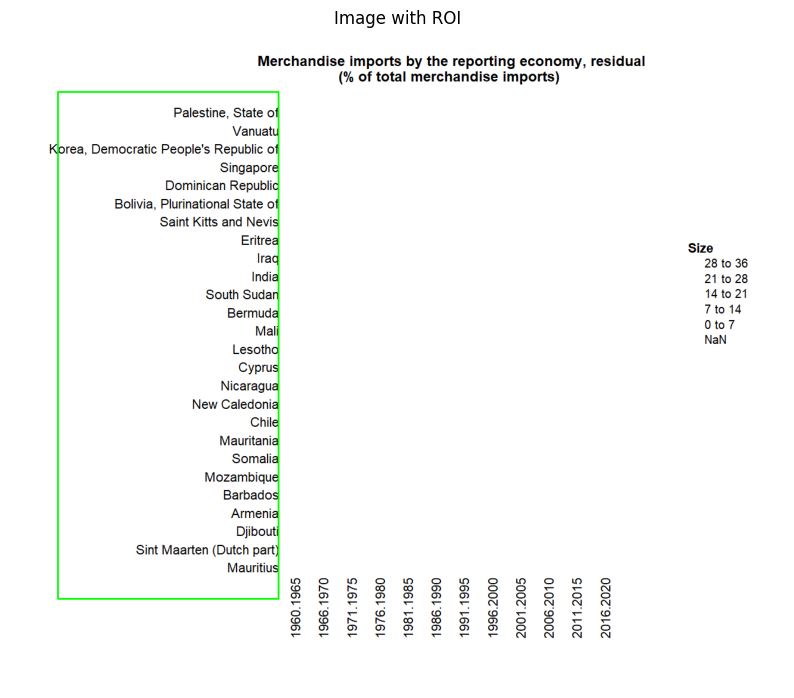

Extracted Text from ROI:
Palestine, State of
Vanuatu

orea, Democratic People's Republic of
Singapore

Dominican Republic
Bolivia, Plurinational State of
Saint Kitts and Nevis
Eritrea

lraq

India

South Sudan

Bermuda

Mali

Lesotho

Cyprus

Nicaragua

New Caledonia

Chile

Mauritania

Somalia

Mozambique

Barbados

Armenia

Djibouti

Sint Maarten (Dutch part)
Mauritius



In [5]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\encoder-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (80, 100, 380, 850)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the image with the ROI using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image with ROI")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Convert the cropped image to grayscale
        gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to extract text from the cropped region
        text = pytesseract.image_to_string(gray_cropped)

        print("Extracted Text from ROI:")
        print(text)

Extracted Text from ROI:
Size
64 to 78
51 ta 64
38 to 51
24 ta 38
11 to 24
NaN




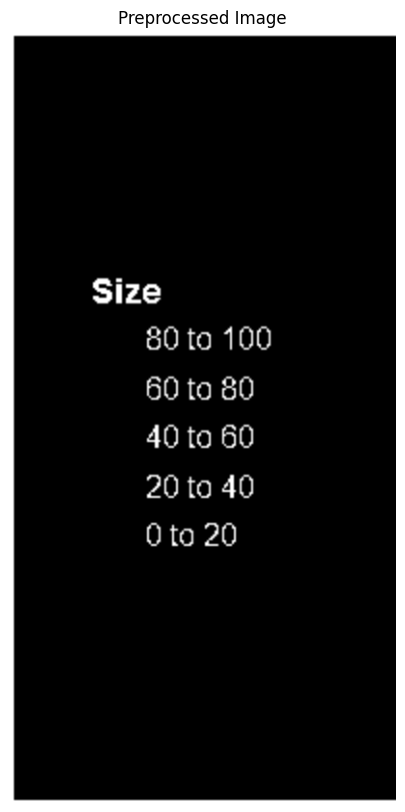

Extracted Text from ROI:
Size
80 to 100
60 ta 80
40 to 60
20 ta 40
0 to 20




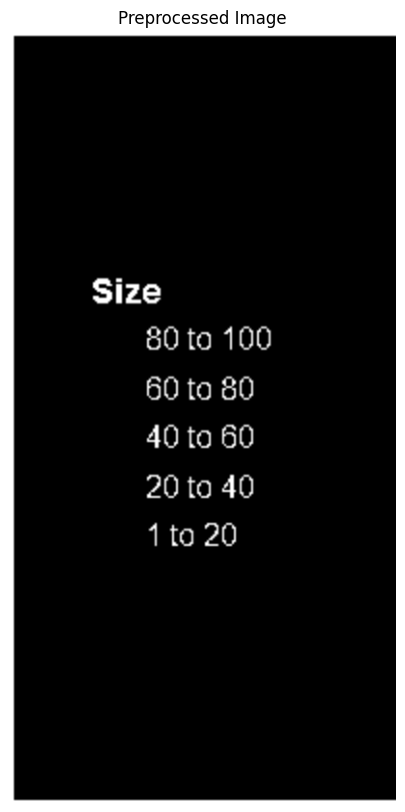

Extracted Text from ROI:
Size
80 to 100
60 ta 80
40 to 60
20 ta 40
1 to 20




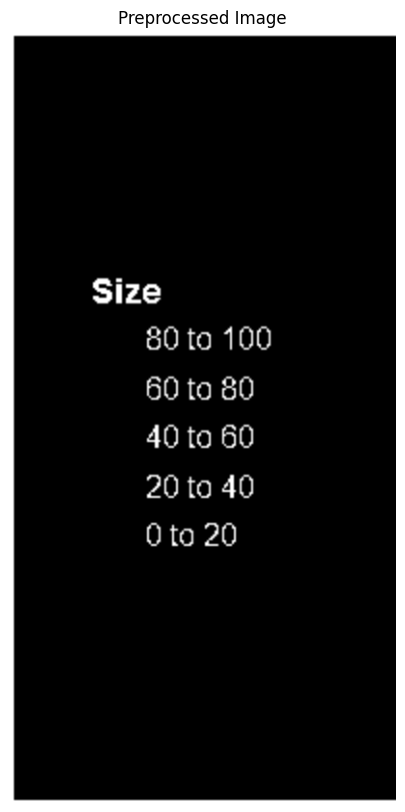

Extracted Text from ROI:
Size
80 to 100
60 ta 80
40 to 60
20 ta 40
0 to 20




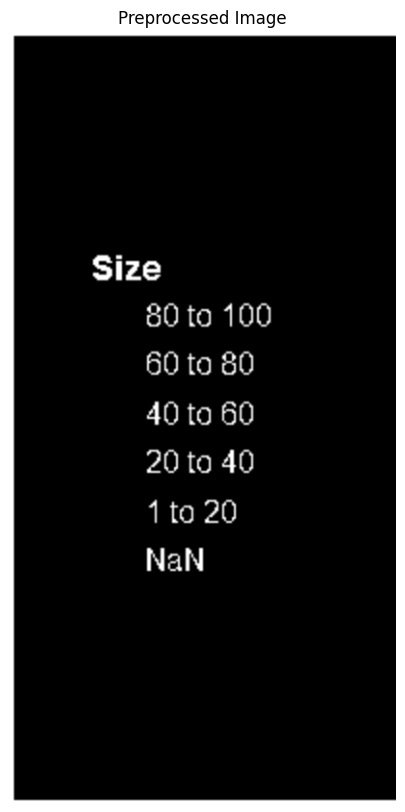

Extracted Text from ROI:
Size
80 to 100
60 ta 80
40 to 60
20 ta 40
1 to 20
NaN




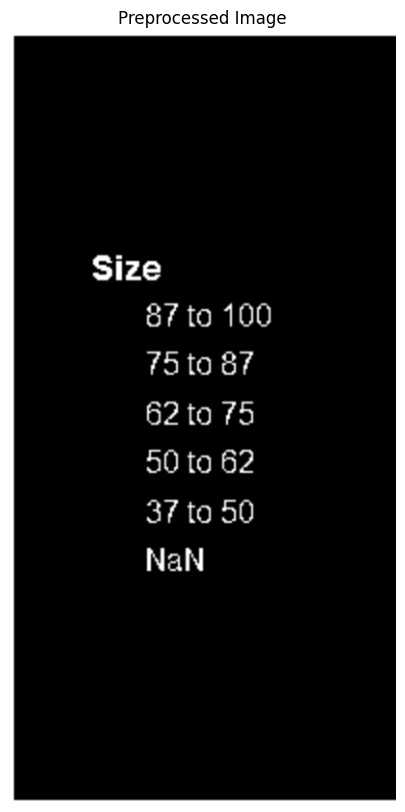

Extracted Text from ROI:
Size
87 ta 100
75ta 8?
62 to 75
50 to 62
37 ta 50
NaN




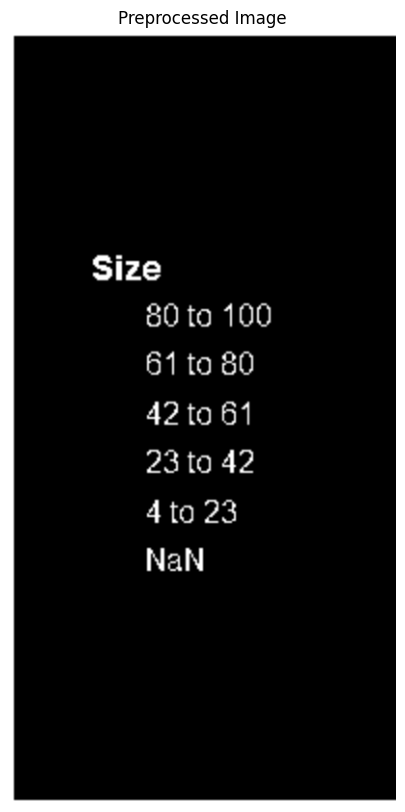

Extracted Text from ROI:
Size
80 to 100
61 ta 80
42 ta 61
23 ta 42
4to 23
NaN




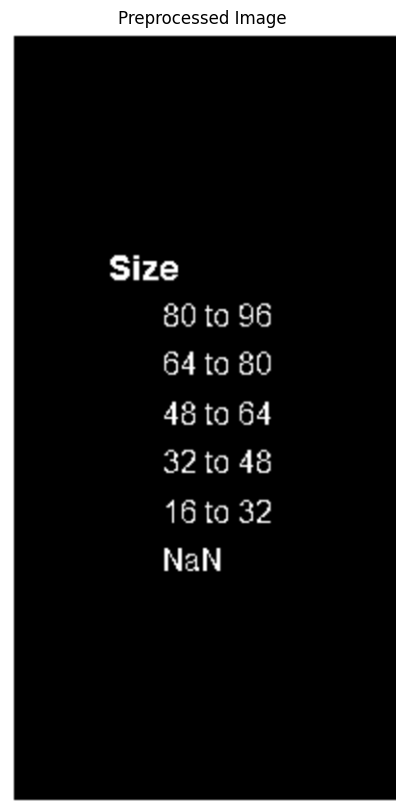

Extracted Text from ROI:
Size
80 to 96
64 ta 80
48 to 64
32 ta 48
16 to 32
NaN




Extracted Text from ROI:
Size
87 ta 98
75ta 8?
63 to 75
52 ta 63
40 ta 52
NaN




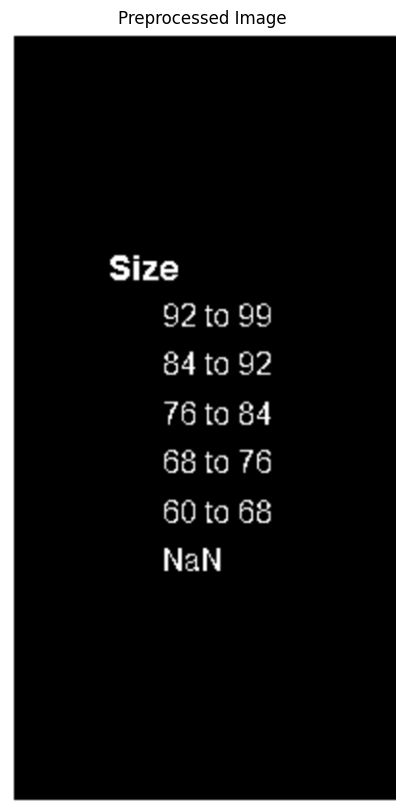

Extracted Text from ROI:
Size
92 ta 99
84 ta 92
76 ta 84
68 to 76
60 to 68
NaN




Extracted Text from ROI:
Size
90 ta 99
80 ta 90
70 ta 80
60 to 70
51 ta 60
NaN




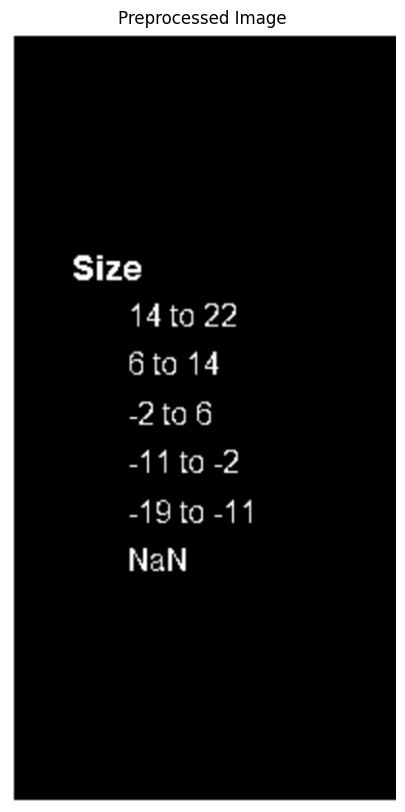

Extracted Text from ROI:
Size
14 to 22
6 to 14
-2ta6
-11 ta -2
-19 ta -11
NaN




Extracted Text from ROI:
9e+04 to 6.11e+04

8e+04 to 4.89e+04

6§e+04 to 3.68e+04

4e+04 to 2.46e+04
to 1.24e+04




Extracted Text from ROI:
4e+04 to 4.79e+04
8e+04 to 3.84e+04
2e+04 to 2.88e+04
5 to 1.92e+04

to 9655




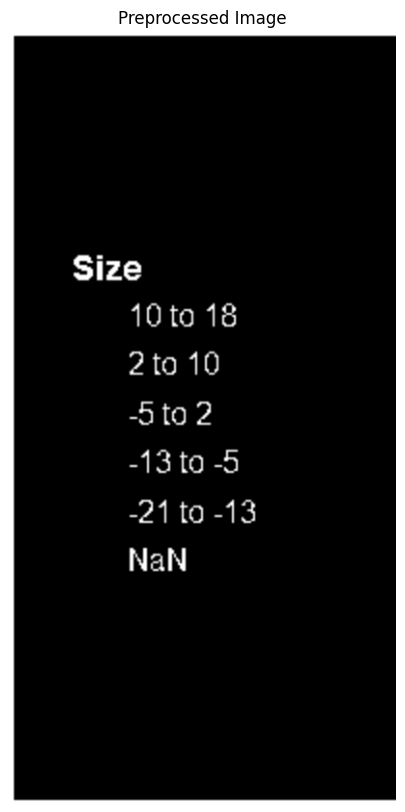

Extracted Text from ROI:
Size
10 to 18
2 to 10
-5 toa 2
-13 ta -5
-21ta-13
NaN




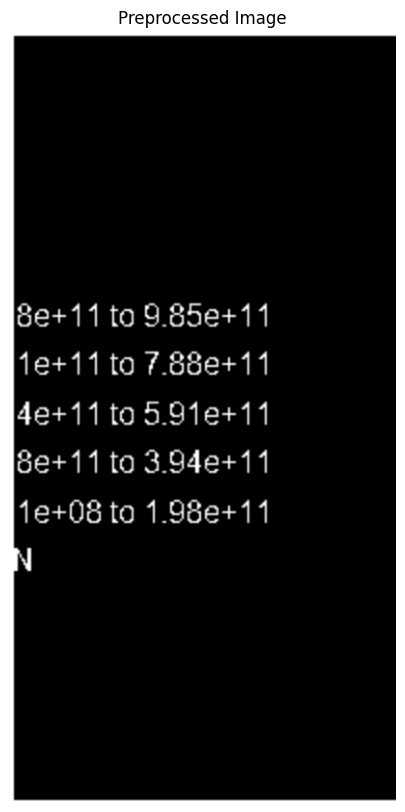

Extracted Text from ROI:
8e+11 to 9.85e+11
je+11 to 7.88e+11
4e+11 to 5.91e+11
8e+11 to 3.94e+11
1e+08 to 1.98e+11




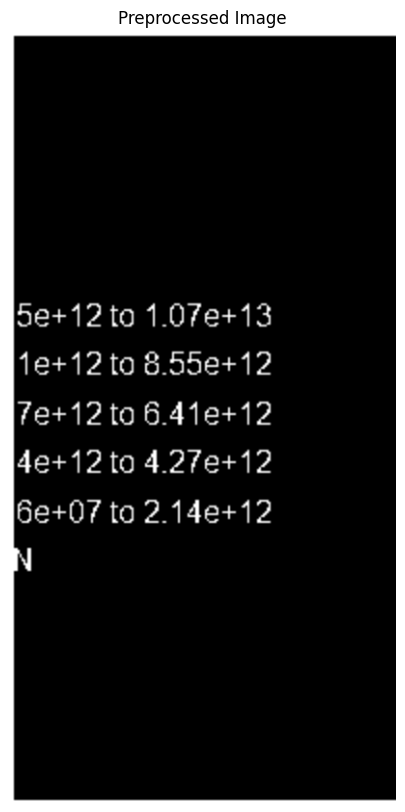

Extracted Text from ROI:
5e+12 to 1.07e+13
fe+12 to 8.55e+12
7e+12 to 6.41e+12
4e+12 to 4.27e+12
6§e+07 to 2.14e+12




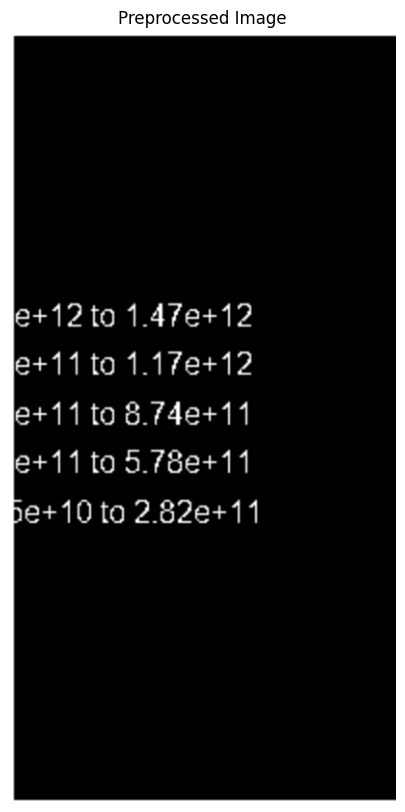

Extracted Text from ROI:
le+12 to 1.47e+12
le+11 to 1.17e+12
le+11 to 8.74e+11
le+11 to 5.78e+11
e+10 to 2.82e+11




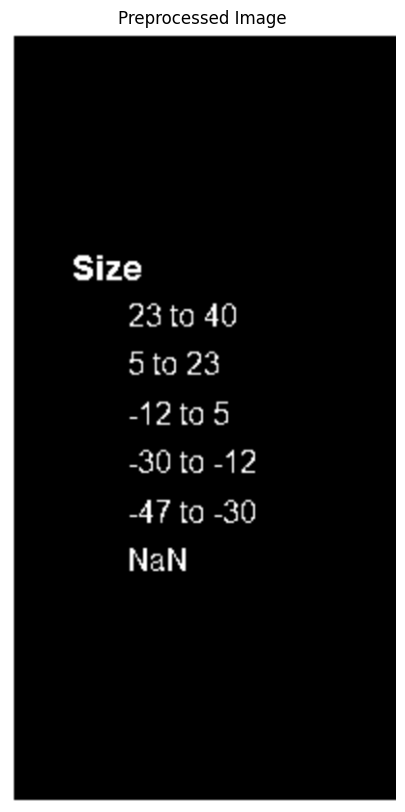

Extracted Text from ROI:
Size
23 ta 40
5 to 23
-12ta5
-30 to -12
-47 to -30
NaN




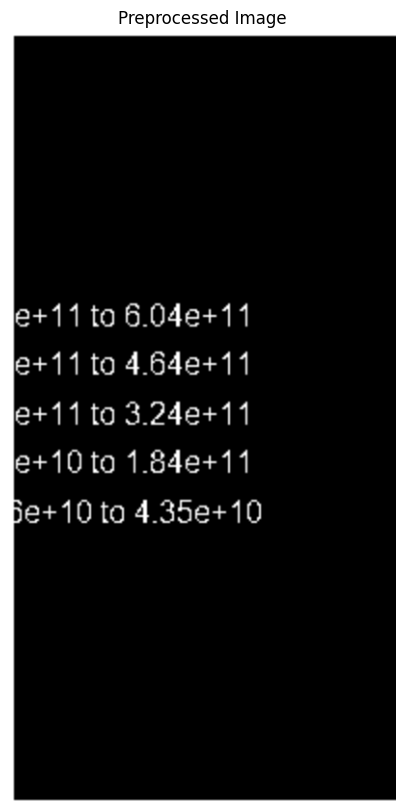

Extracted Text from ROI:
le+11 to 6.04e+11
le+11 to 4.64e+11
le+11 to 3.24e+11
le+10 to 1.84e+11
e+10 to 4.35e+10




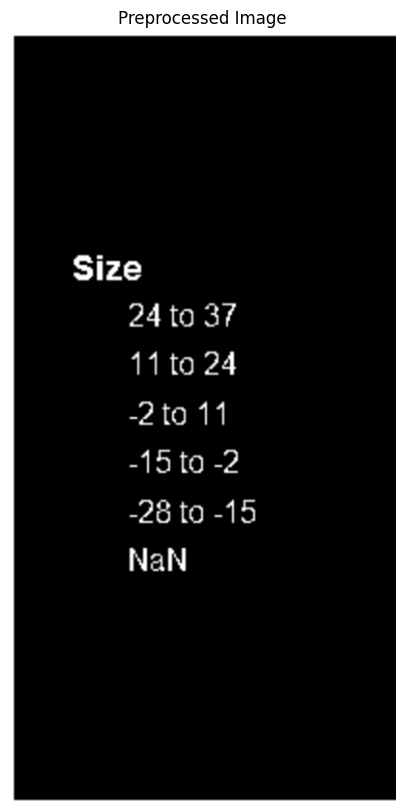

Extracted Text from ROI:
Size
24 ta 37
11 to 24
-2to 11
-15 to -2
-28 to -15
NaN




In [83]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\thesis-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (1000, 200, 250, 400)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Preprocessing steps
        # Convert the cropped image to grayscale
        gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Apply simple thresholding
        _, thresh_image = cv2.threshold(gray_cropped, 150, 255, cv2.THRESH_BINARY_INV)

        # Resize the image to improve OCR accuracy
        resized_image = cv2.resize(thresh_image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

        # Display the preprocessed image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(resized_image, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Use Tesseract to extract text from the preprocessed image
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(resized_image)

        print("Extracted Text from ROI:")
        print(text)

Extracted Text from Rotated ROI:
1975.1984

1985.1994

1995.2003

2004.2012

2013.2021




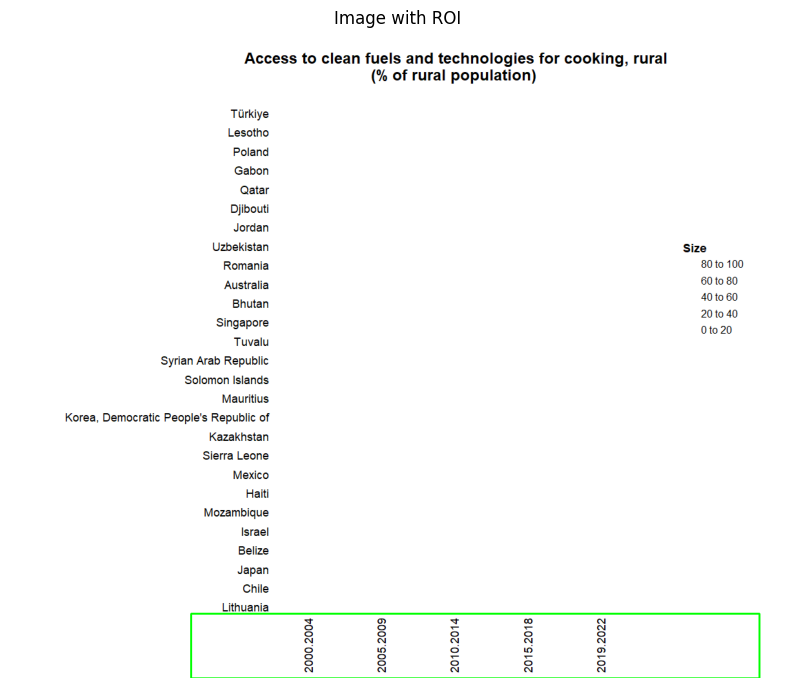

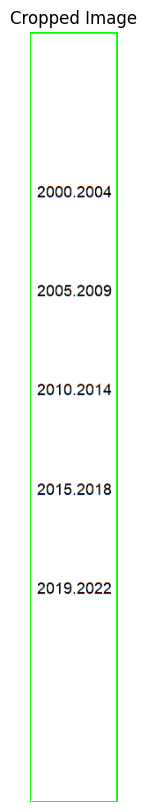

Extracted Text from Rotated ROI:
2000.2004

2005.2009

2010.2014

2015.2018

2019.2022




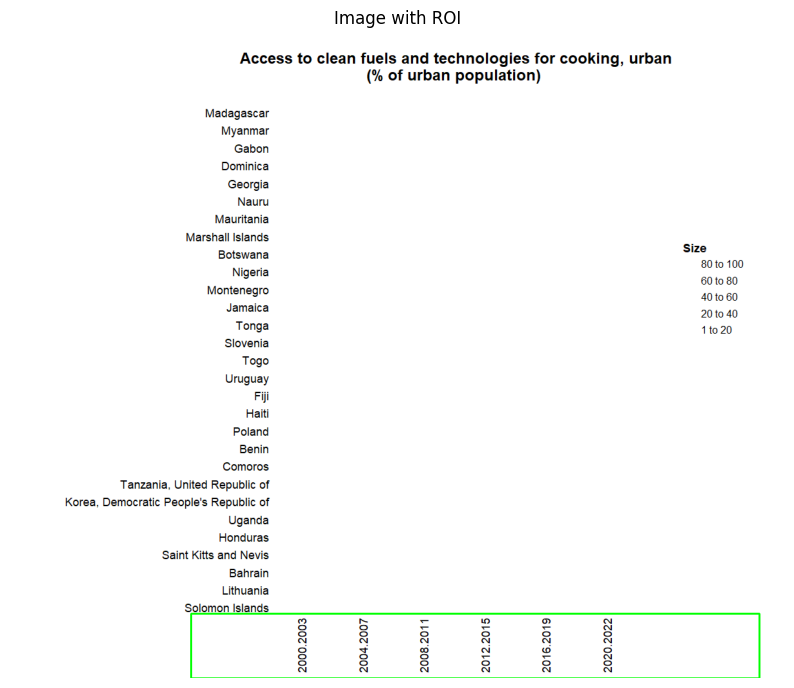

Extracted Text from Rotated ROI:
2000.2003

2004.2007

2008.2011

2012.2015

2016.2019

2020.2022




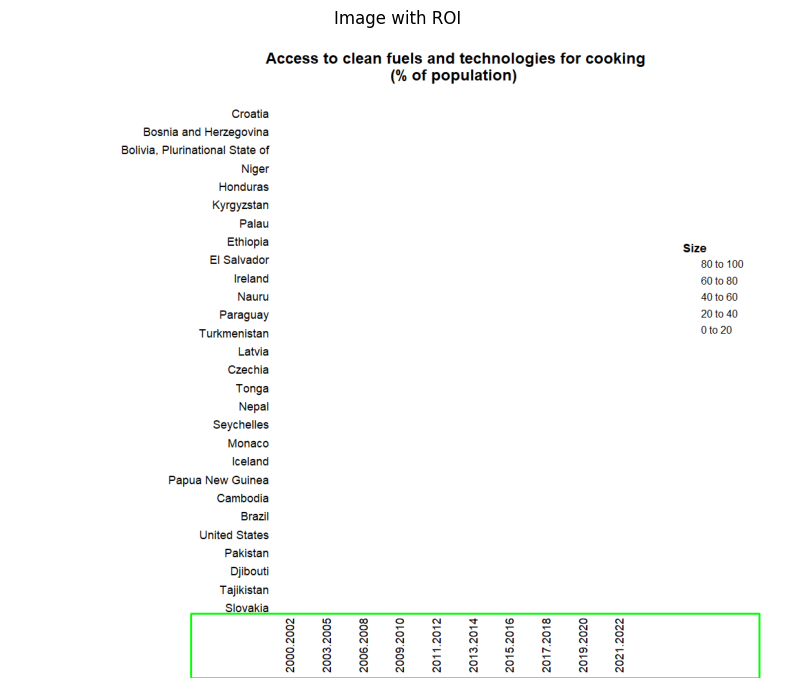

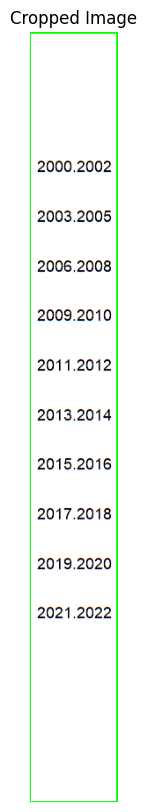

Extracted Text from Rotated ROI:
2000.2002

2003.2005

2006.2008

2009.2010

2011.2012

2013.2014

2015.2016

2017.2018

2019.2020

2021.2022




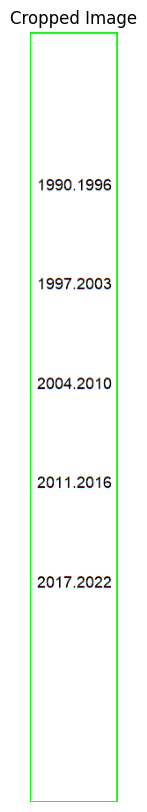

Extracted Text from Rotated ROI:
1990.1996

1997.2003

2004.2010

2011.2016

2017.2022




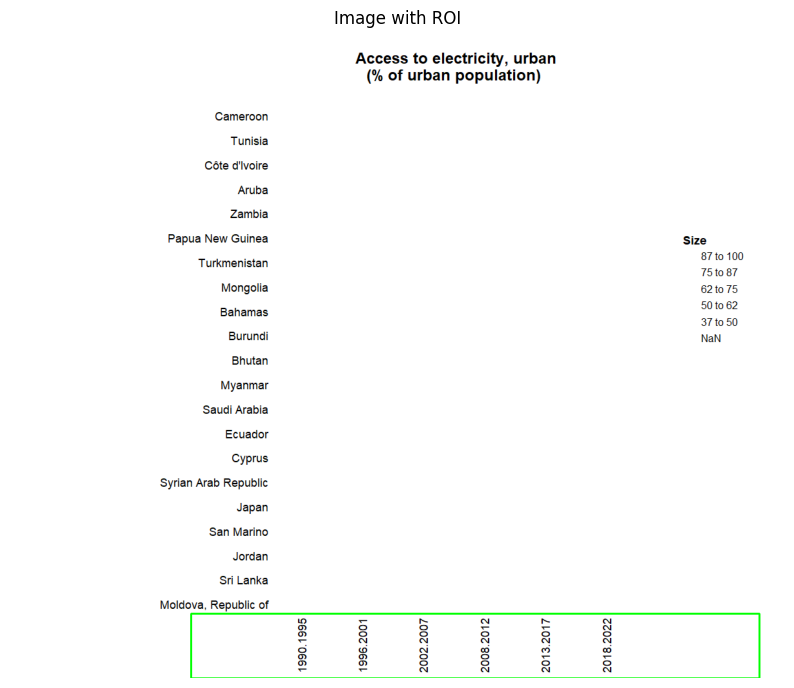

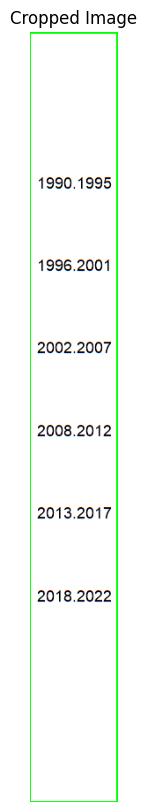

Extracted Text from Rotated ROI:
1990.1995

1996.2001

2002.2007

2008.2012

2013.2017

2018.2022




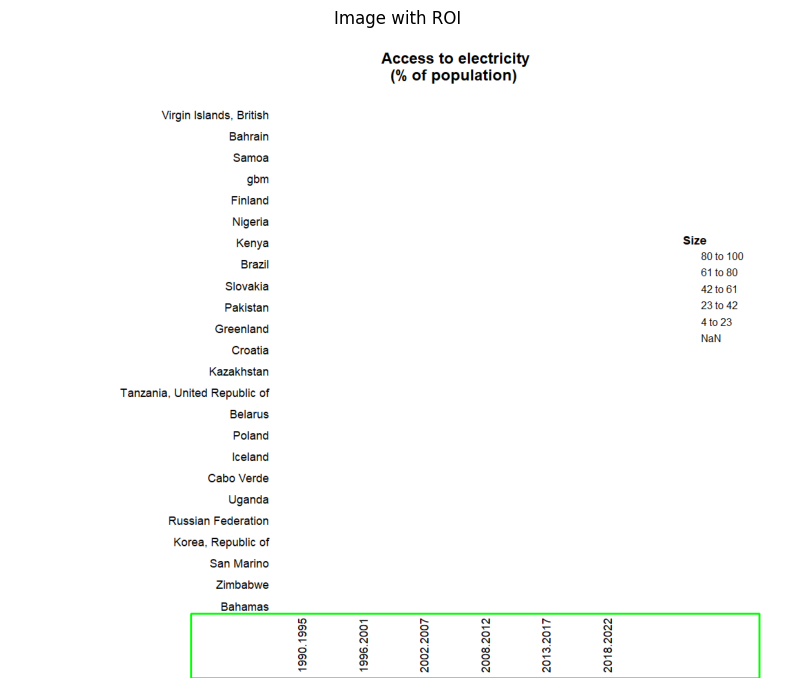

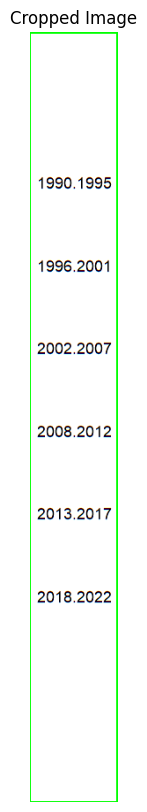

Extracted Text from Rotated ROI:
1990.1995

1996.2001

2002.2007

2008.2012

2013.2017

2018.2022




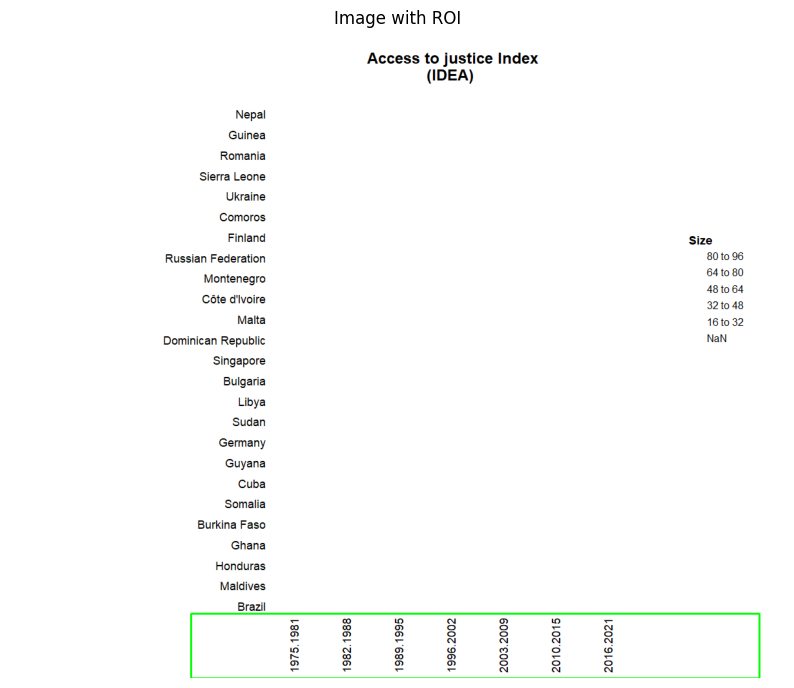

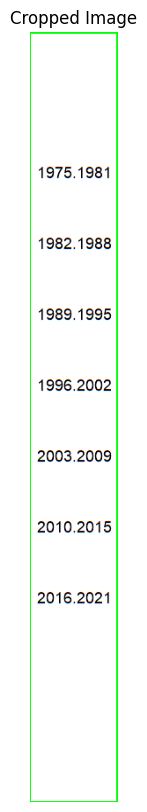

Extracted Text from Rotated ROI:
1975.1981

1982.1988

1989.1995

1996.2002

2003.2009

2010.2015

2016.2021




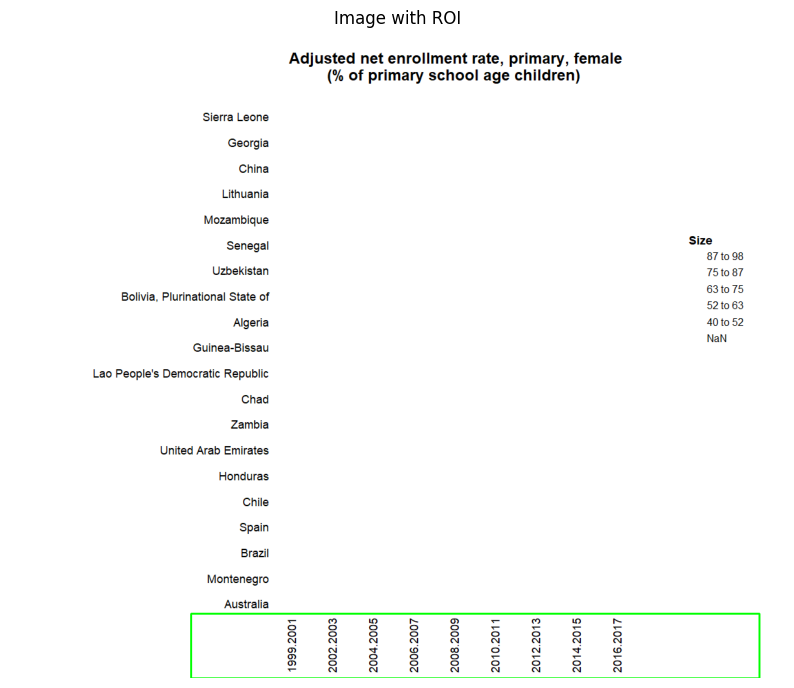

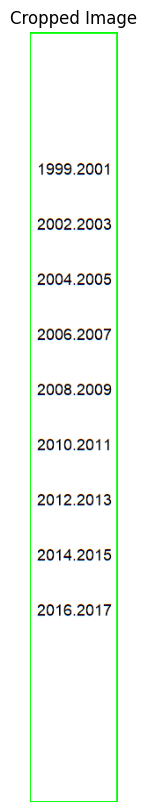

Extracted Text from Rotated ROI:
1999.2001

2002.2003

2004.2005

2006.2007

2008.2009

2010.2011

2012.2013

2014.2015

2016.2017




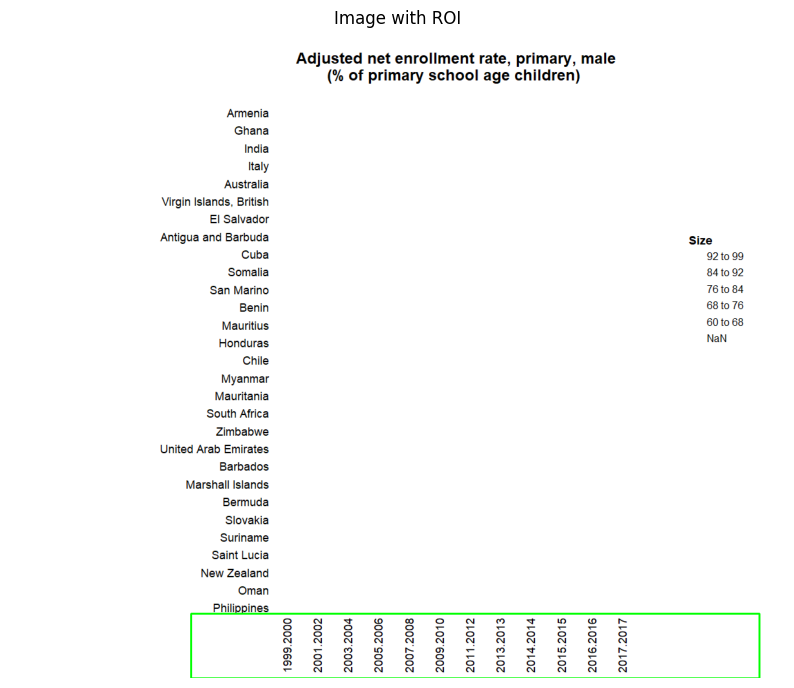

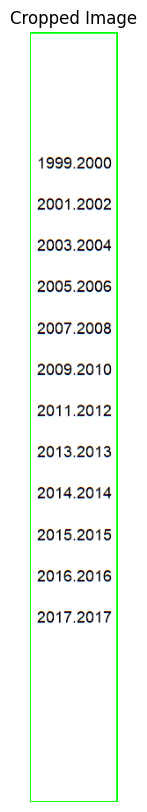

Extracted Text from Rotated ROI:
1999.2000

2001.2002

2003.2004

2005.2006

2007.2008

2009.2010

2011.2012

2013.2013

2014.2014

2015.2015

2016.2016

2017.2017




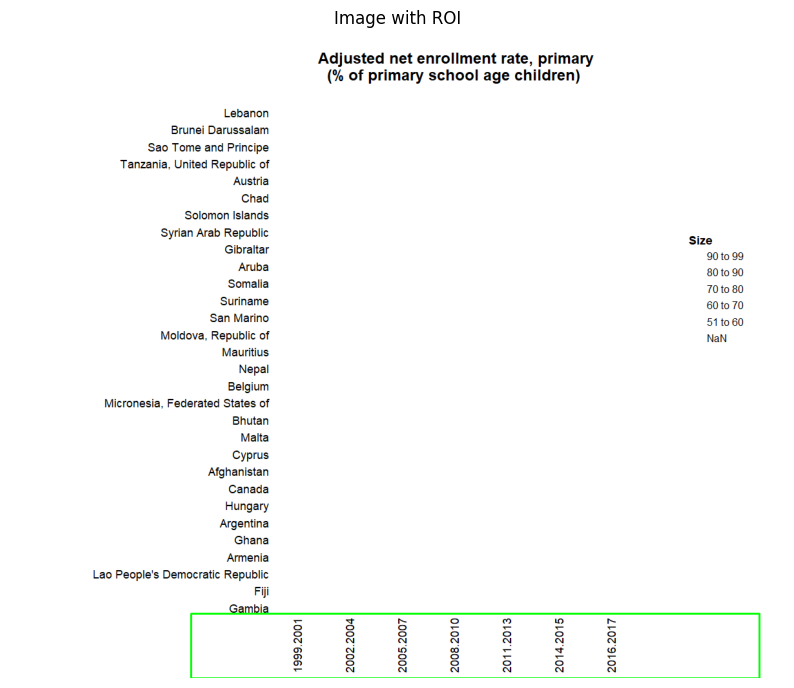

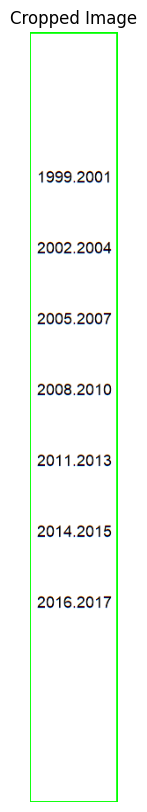

Extracted Text from Rotated ROI:
1999.2001

2002.2004

2005.2007

2008.2010

2011.2013

2014.2015

2016.2017




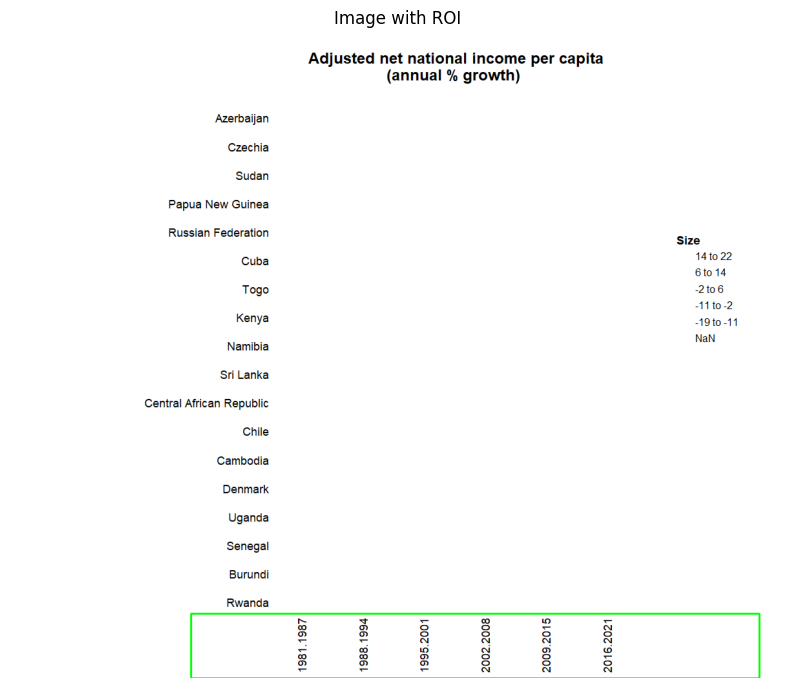

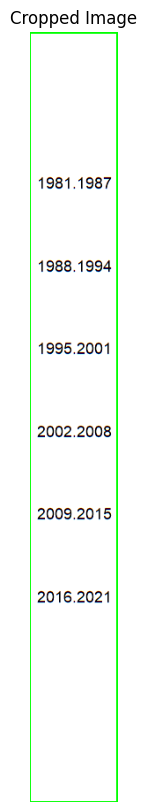

Extracted Text from Rotated ROI:
1981.1987

1988.1994

1995.2001

2002.2008

2009.2015

2016.2021




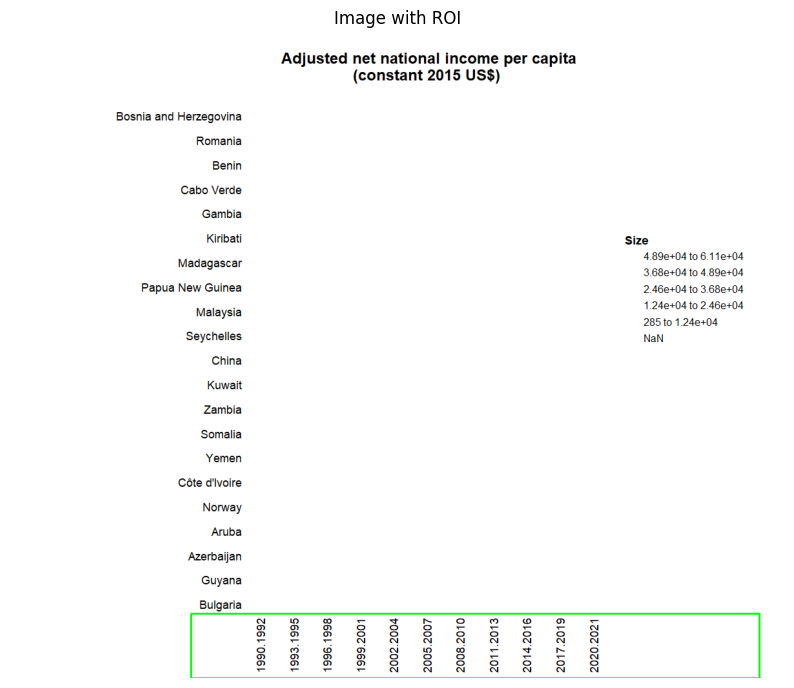

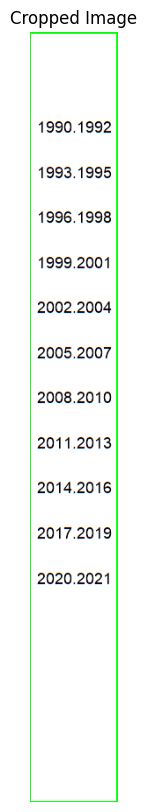

Extracted Text from Rotated ROI:
1990.1992

1993.1995

1996.1998

1999.2001

2002.2004

2005.2007

2008.2010

2011.2013

2014.2016

2017.2019

2020.2021




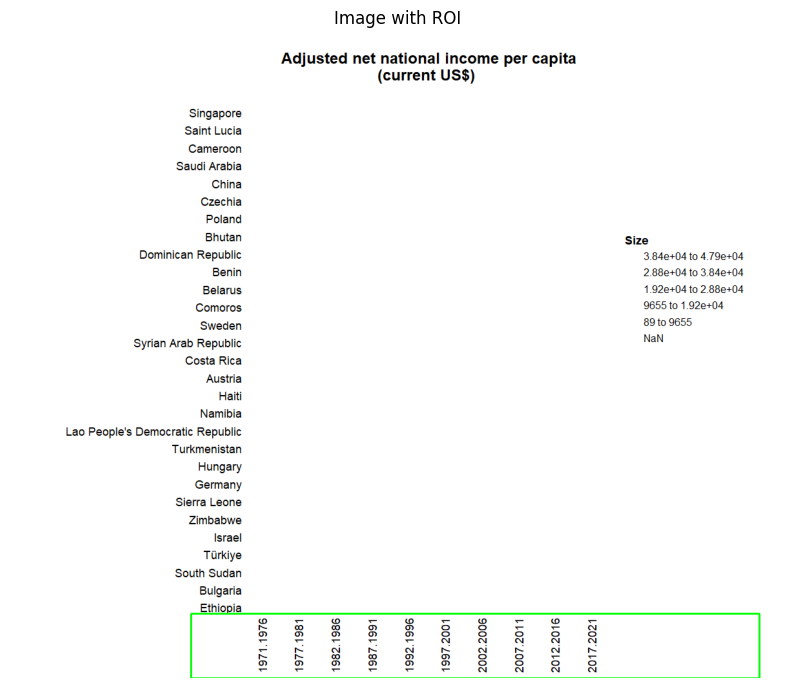

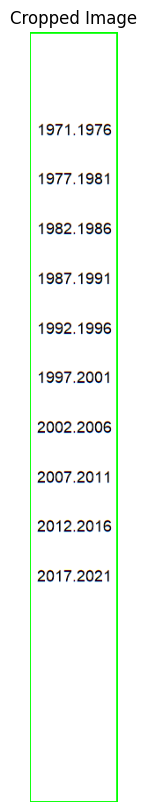

Extracted Text from Rotated ROI:
1971.1976

1977.1981

1982.1986

1987.1991

1992.1996

1997.2001

2002.2006

2007.2011

2012.2016

2017.2021




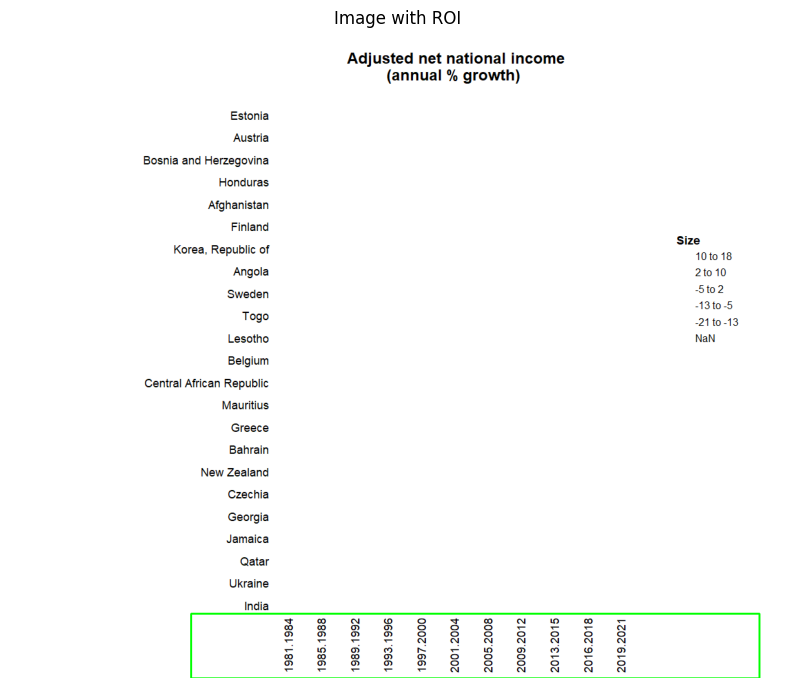

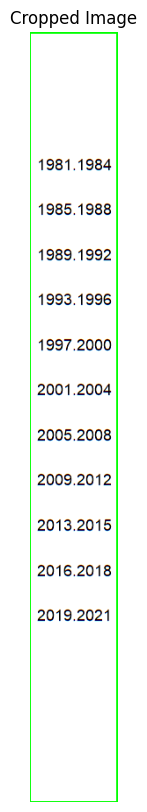

Extracted Text from Rotated ROI:
1981.1984

1985.1988

1989.1992

1993.1996

1997.2000

2001.2004

2005.2008

2009.2012

2013.2015

2016.2018

2019.2021




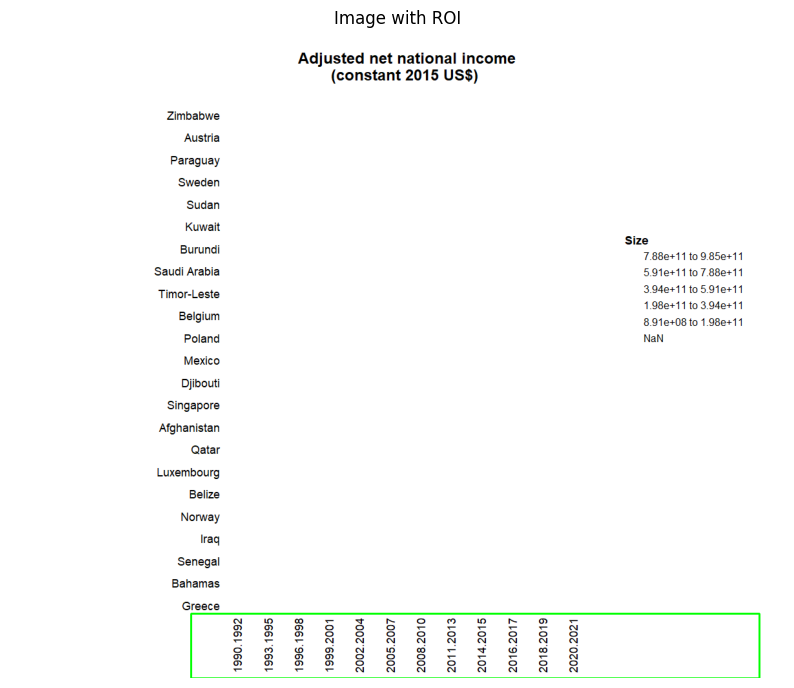

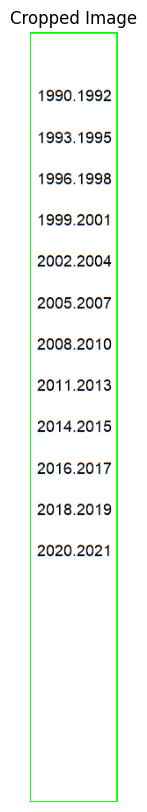

Extracted Text from Rotated ROI:
1990.1992

1993.1995

1996.1998

1999.2001

2002.2004

2005.2007

2008.2010

2011.2013

2014.2015

2016.2017

2018.2019

2020.2021




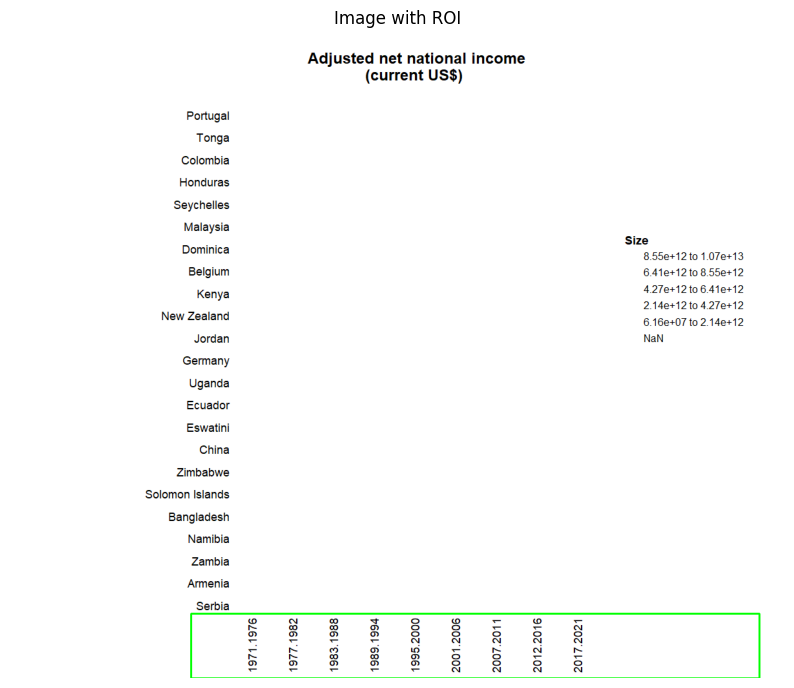

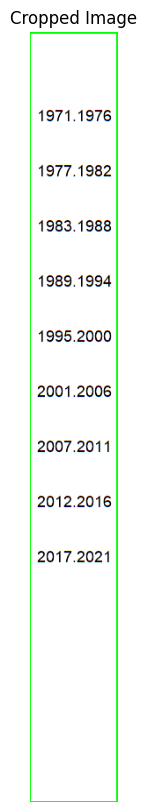

Extracted Text from Rotated ROI:
1971.1976

1977.1982

1983.1988

1989.1994

1995.2000

2001.2006

2007.2011

2012.2016

2017.2021




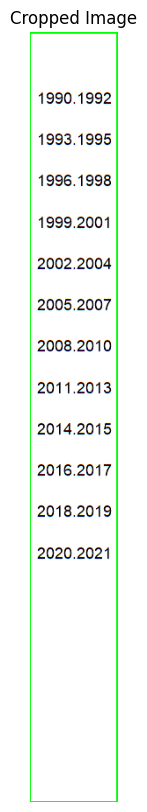

Extracted Text from Rotated ROI:
1990.1992

1993.1995

1996.1998

1999.2001

2002.2004

2005.2007

2008.2010

2011.2013

2014.2015

2016.2017

2018.2019

2020.2021




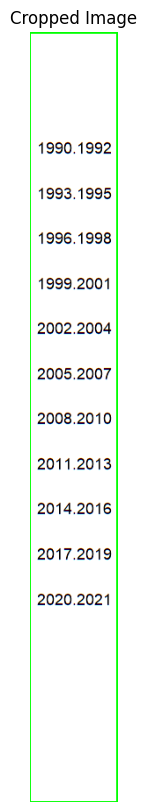

Extracted Text from Rotated ROI:
1990.1992

1993.1995

1996.1998

1999.2001

2002.2004

2005.2007

2008.2010

2011.2013

2014.2016

2017.2019

2020.2021




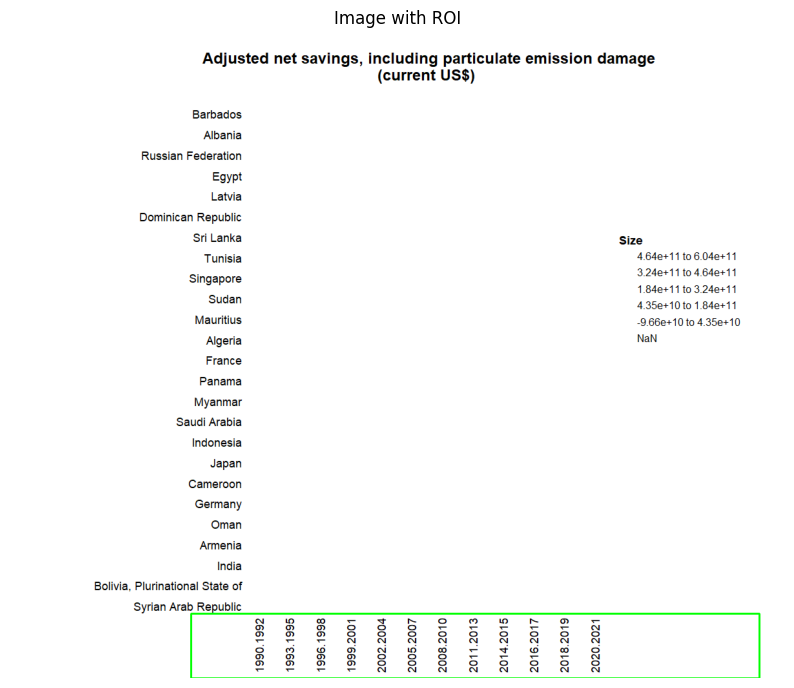

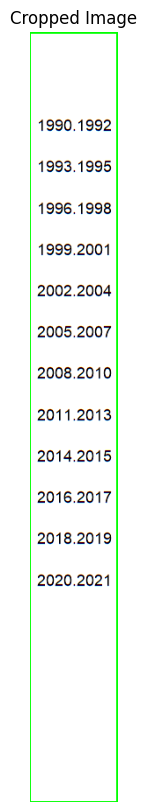

Extracted Text from Rotated ROI:
1990.1992

1993.1995

1996.1998

1999.2001

2002.2004

2005.2007

2008.2010

2011.2013

2014.2015

2016.2017

2018.2019

2020.2021




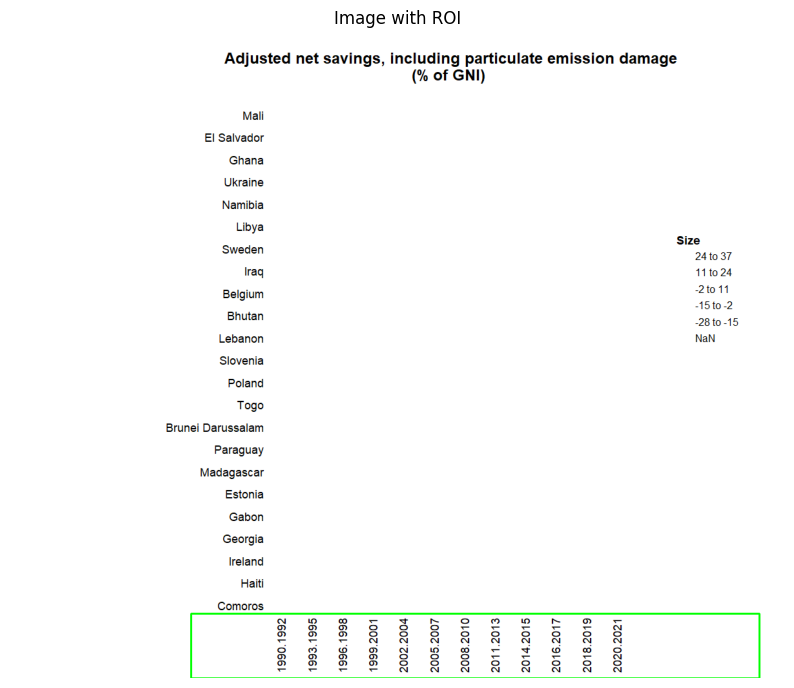

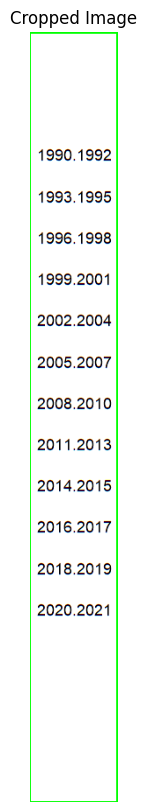

Extracted Text from Rotated ROI:
1990.1992

1993.1995

1996.1998

1999.2001

2002.2004

2005.2007

2008.2010

2011.2013

2014.2015

2016.2017

2018.2019

2020.2021




In [60]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\thesis-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (280, 900, 880, 100)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the image with the ROI using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image with ROI")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Rotate the cropped image 90 degrees clockwise
        rotated_image = cv2.rotate(cropped_image, cv2.ROTATE_90_CLOCKWISE)

        # Display the cropped image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
        plt.title("Cropped Image")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Convert the rotated image to grayscale
        gray_rotated = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to extract text from the rotated region
        text = pytesseract.image_to_string(gray_rotated)

        print("Extracted Text from Rotated ROI:")
        print(text)